In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [4]:
data=pd.read_csv(r"D:\DS PYTHON\Assignment\my_movies.csv")

In [5]:
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [6]:
# Taking from 6th column 

In [7]:
df=df.iloc[:,6:]

In [8]:
df.head()

,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,0,1,1,0,1,0,0,0,1
1,1,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0


In [10]:
# calling apriori Algorith on the dataset 

### Min_support = 5% and confidence level = 60 %

In [11]:
score1=apriori(df,min_support=0.05,use_colnames=True)

C:\Users\psaro\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
score1

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(LOTR1)
2,0.2,(Harry Potter1)
3,0.6,(Patriot)
4,0.2,(LOTR2)
5,0.1,(Harry Potter2)
6,0.1,(LOTR)
7,0.1,(Braveheart)
8,0.2,(Green Mile)
9,0.6,"(Patriot, Gladiator)"


#### Creating the asociation rule 

In [13]:
model1=association_rules(score1,metric='lift')

In [14]:
model1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80
2,(Gladiator),(LOTR),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
69,"(Green Mile, Harry Potter1)","(LOTR1, LOTR2)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
70,(LOTR1),"(LOTR2, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
71,(LOTR2),"(LOTR1, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
72,(Green Mile),"(LOTR1, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [25]:
# taking only those movies whose confidence is more than 60 % and lift ratio is more than 1

In [16]:
model1=model1[(model1['confidence']>=0.60) & (model1['lift']>=1)]

### visualizing the support and confidence level

Text(0, 0.5, 'Confidence')

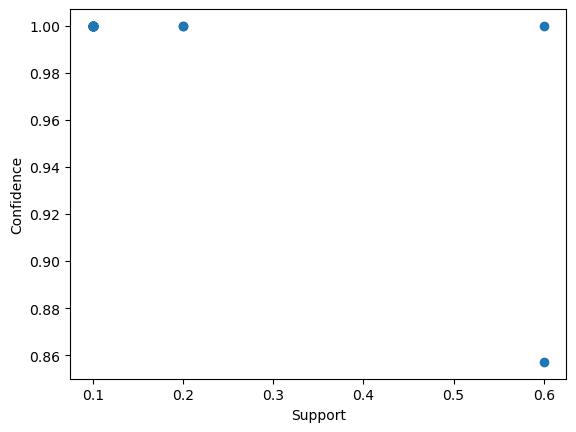

In [18]:
plt.scatter(model1['support'],model1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')

### Min_support = 10% and confidence level = 70 %

In [19]:
score2=apriori(df,min_support=0.1,use_colnames=True)

C:\Users\psaro\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [20]:
score2

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(LOTR1)
2,0.2,(Harry Potter1)
3,0.6,(Patriot)
4,0.2,(LOTR2)
5,0.1,(Harry Potter2)
6,0.1,(LOTR)
7,0.1,(Braveheart)
8,0.2,(Green Mile)
9,0.6,"(Patriot, Gladiator)"


#### Creating the asociation rule 

In [21]:
model2=association_rules(score2,metric='lift')

In [22]:
model2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80
2,(Gladiator),(LOTR),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
69,"(Green Mile, Harry Potter1)","(LOTR1, LOTR2)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
70,(LOTR1),"(LOTR2, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
71,(LOTR2),"(LOTR1, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
72,(Green Mile),"(LOTR1, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [24]:
# taking only those movies whose confidence is more than 70 % and lift ratio is more than 1

In [26]:
model2=model2[(model2['confidence']>=0.70) & (model2['lift']>=1)]

### visualizing the support and confidence level

Text(0, 0.5, 'Confidence')

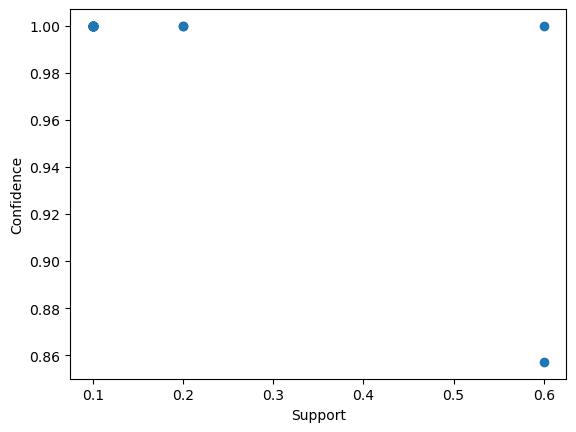

In [27]:
plt.scatter(model2['support'],model2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')

### Min_support = 20% and confidence level = 80 %

In [28]:
score3=apriori(df,min_support=0.2,use_colnames=True)

C:\Users\psaro\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [29]:
score3

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(LOTR1)
2,0.2,(Harry Potter1)
3,0.6,(Patriot)
4,0.2,(LOTR2)
5,0.2,(Green Mile)
6,0.6,"(Patriot, Gladiator)"
7,0.2,"(LOTR1, LOTR2)"


#### Creating the asociation rule 

In [30]:
model3=association_rules(score3,metric='lift')

In [31]:
model3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [37]:
# taking only those movies whose confidence is more than 80 % and lift ratio is more than 1

In [38]:
model3=model3[(model3['confidence']>=0.80) & (model3['lift']>=1)]

In [39]:
model3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf


### visualizing the support and confidence level

Text(0, 0.5, 'Confidence')

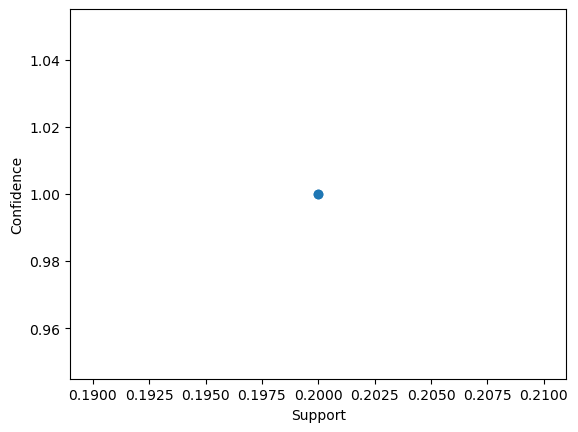

In [36]:
plt.scatter(model3['support'],model3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')